<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 89.9 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 207.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 189.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=40e2a82f2b480468f28ee3fa62193d6c1006b3ea3ecd6b763ce0f75f57734b84
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.3-cp312-cp312-linux_x86_64.whl size=303891 sha256=687032589295d75bf1c214b259f09521a55e1ade0cc0ce115459c5437bb1d8ba
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/e2/48

In [42]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [20]:
!pip install yfinance

In [23]:
import yfinance as yf
tesla= yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [22]:
tesla_data= tesla.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [24]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}

html_data = requests.get(url, headers=headers).text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")

print("Number of tables found:", len(tables))

for i, table in enumerate(tables):
    print(f"\n---- TABLE {i} ----")
    # Print the first 3 rows of each table
    for row in table.find_all("tr")[:3]:
        print(row.text.strip())

Number of tables found: 6

---- TABLE 0 ----
Tesla Annual Revenue(Millions of US $)
2024
$97,690
2023
$96,773

---- TABLE 1 ----
Tesla Quarterly Revenue(Millions of US $)
2025-09-30
$28,095
2025-06-30
$22,496

---- TABLE 2 ----
Sector
Industry
Market Cap
Revenue
Auto/Tires/Trucks
Auto Manufacturers - Domestic
$1432.098B
$97.690B
Tesla designs, develops, manufactures, sells and leases high-performance fully electric vehicles and energy generation and storage systems, and offer services related to their products. They generally sell their products directly to customers and continue to grow their customer-facing infrastructure through a global network of vehicle showrooms and service centers, Mobile Service, body shops, Supercharger stations and Destination Chargers.

---- TABLE 3 ----
Stock Name
Country
Market Cap
PE Ratio
General Motors (GM)
United States
$67.017B
7.16
Ford Motor (F)
United States
$53.592B
9.96

---- TABLE 4 ----
Link Preview
HTML Code (Click to Copy)
Tesla Revenue 2011

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [26]:
soup= BeautifulSoup(html_data, 'html.parser')

print('HTML parsed successfully')
print(f'Page title: {soup.title.text if soup.title else 'No title'}')

HTML parsed successfully
Page title: Tesla Revenue 2011-2025 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [39]:
!pip install lxml

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
for i, table in enumerate(tables):
    if 'Quarterly' in table.text or 'Revenue' in table.text:
        print(f"Table {i} might contain revenue data")

Table 0 might contain revenue data
Table 1 might contain revenue data
Table 2 might contain revenue data
Table 4 might contain revenue data
Table 5 might contain revenue data


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in tables:
    if 'Quarterly' in table.text and 'Revenue' in table.text:
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)
        break

print("Original Tesla Revenue Data:")
print(tesla_revenue.head())

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

print("\nCleaned Tesla Revenue Data:")
print(tesla_revenue.head())

Original Tesla Revenue Data:
         Date  Revenue
0  2025-09-30  $28,095
1  2025-06-30  $22,496
2  2025-03-31  $19,335
3  2024-12-31  $25,707
4  2024-09-30  $25,182

Cleaned Tesla Revenue Data:
         Date Revenue
0  2025-09-30   28095
1  2025-06-30   22496
2  2025-03-31   19335
3  2024-12-31   25707
4  2024-09-30   25182


Execute the following lines to remove an null or empty strings in the Revenue column.


In [42]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [43]:
tesla_revenue.tail()

,Date,Revenue
55,2011-12-31,39
56,2011-09-30,58
57,2011-06-30,58
58,2011-03-31,49
59,2010-12-31,36


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [44]:
import yfinance as yf

gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [32]:
gme_data = gme.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [33]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [34]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [35]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data_2, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', class_='historical_data_table')
if table is None:
    tables = soup.find_all('table')
    if len(tables) > 1:
        table = tables[1]
data = []
if table:
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
gme_revenue.tail()

,Date,Revenue
10,2015,"$9,296"
11,2014,"$9,040"
12,2013,"$8,887"
13,2012,"$9,551"
14,2011,"$9,474"


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


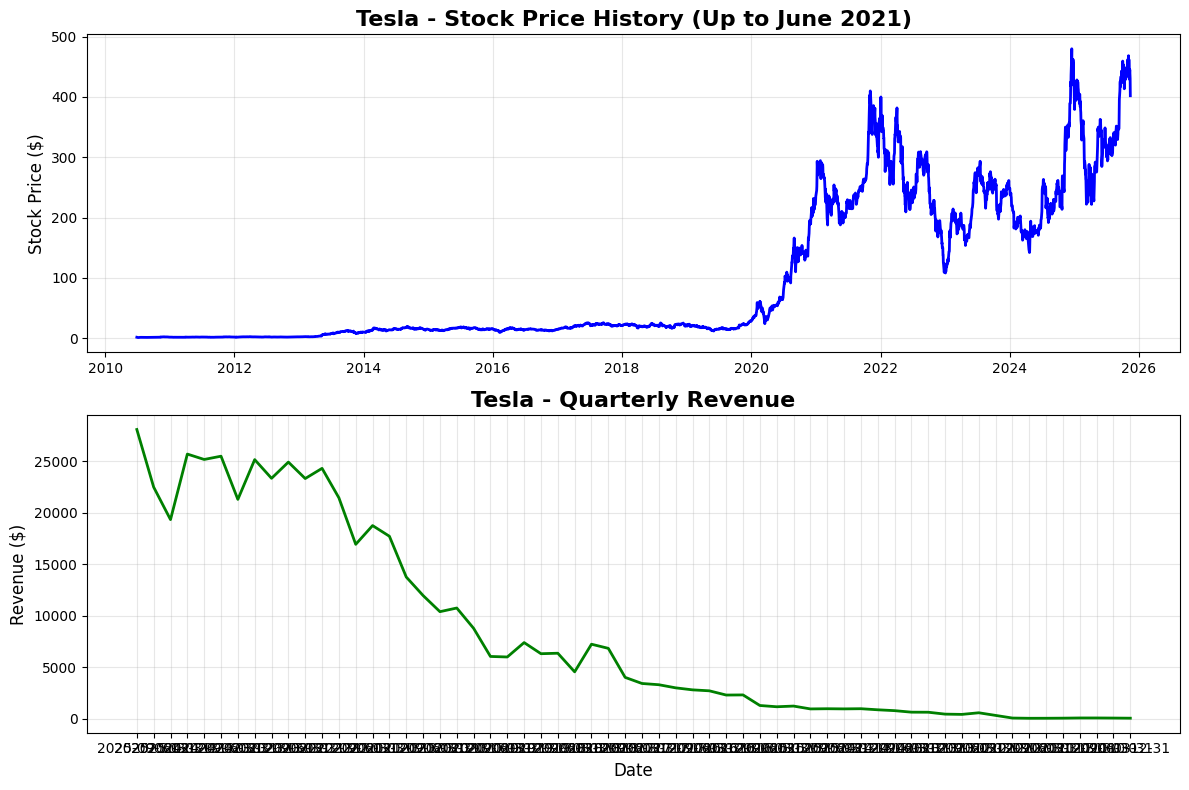

In [45]:
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Date'], stock_data['Close'], color='blue', linewidth=2)
    plt.title(f'{title} - Stock Price History (Up to June 2021)', fontsize=16, fontweight='bold')
    plt.ylabel('Stock Price ($)', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    revenue_numeric = revenue_data['Revenue'].replace('[\$,]', '', regex=True).astype(float)
    plt.plot(revenue_data['Date'], revenue_numeric, color='green', linewidth=2)
    plt.title(f'{title} - Quarterly Revenue', fontsize=16, fontweight='bold')
    plt.ylabel('Revenue ($)', fontsize=12)
    plt.xlabel('Date', fontsize=12)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


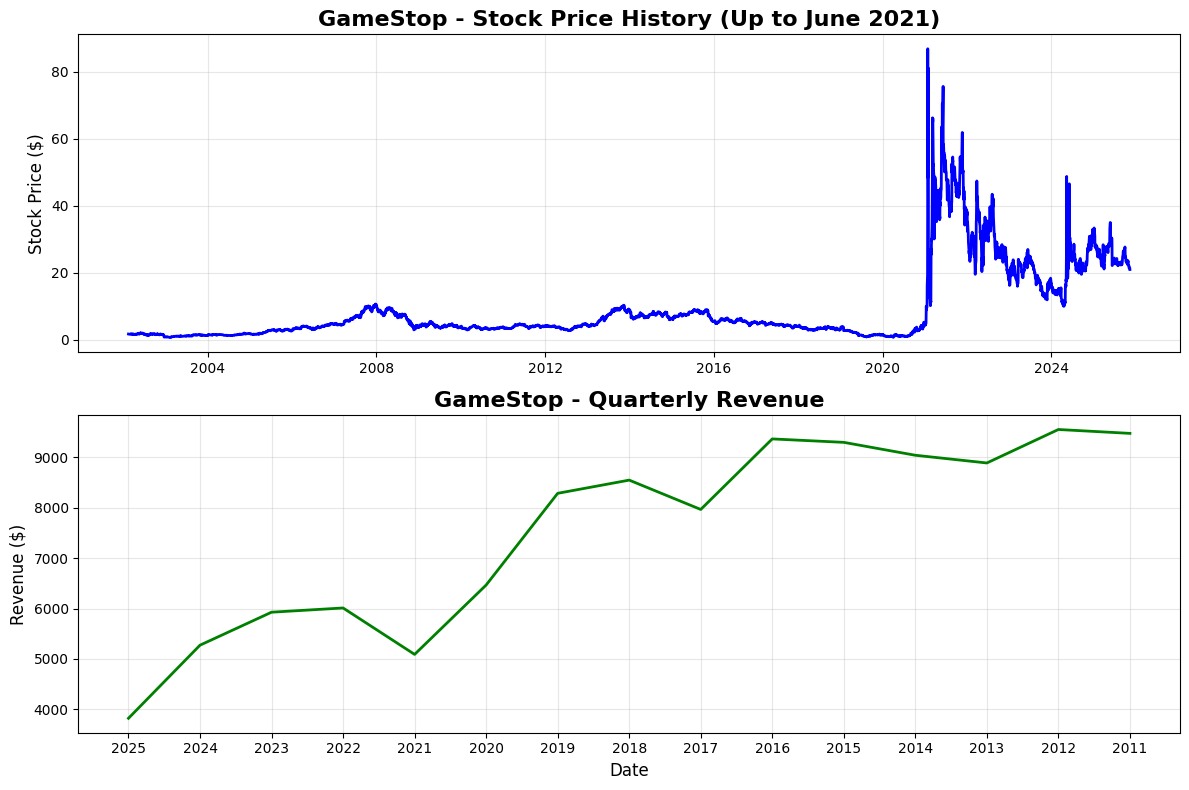

In [46]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
